In [5]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [6]:
#Question 1
from sklearn.datasets import make_blobs
labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

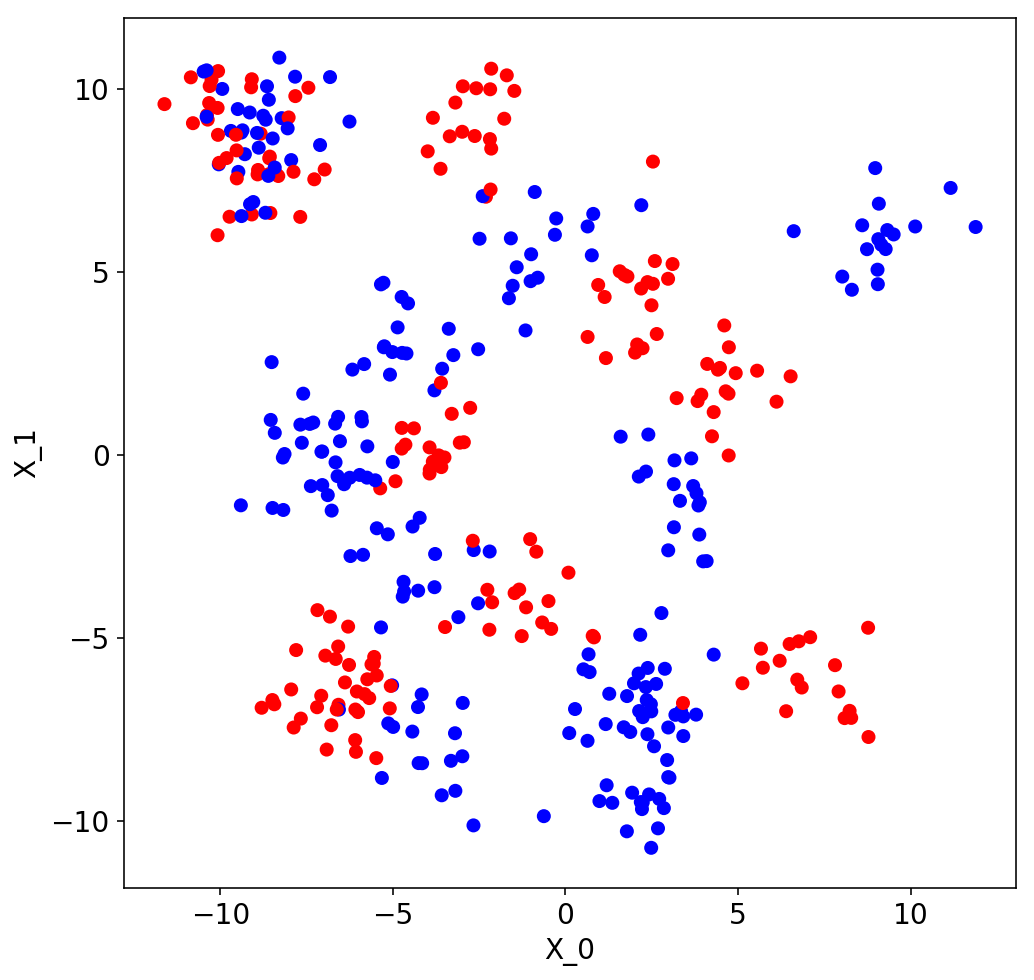

In [7]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.xlabel("X_0")
plt.ylabel("X_1")

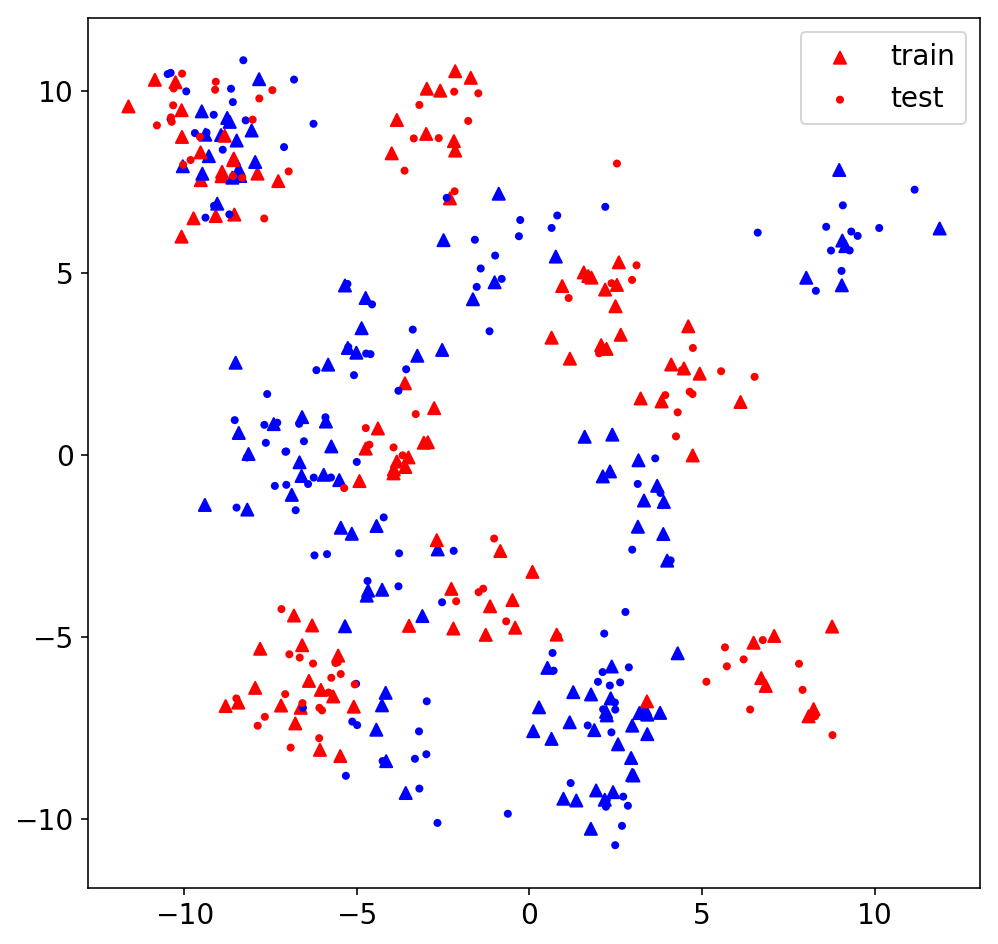

In [19]:
#split in half
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.scatter(X_train[:,0],X_train[:,1] ,marker="^",c=y_train, label='train')
plt.scatter(X_test[:,0],X_test[:,1] ,marker=".",c=y_test, label='test')
plt.legend(loc='best')

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
clf.predict(X_test)==y_test

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,

In [11]:
#True==1; False==0
sum(clf.predict(X_train)==y_train)/len(y_train)

0.91000000000000003

In [12]:
sum(clf.predict(X_test)==y_test)/len(y_test)

0.86499999999999999

In [13]:
#split 10%, 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90% training data
from numpy import ndarray
train = ndarray((9,),float)
test = ndarray((9,),float)
split = ndarray((9,),float)
for i in range(1, 10):
    from sklearn.model_selection import train_test_split
    split[i-1]=0.1*i
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split[i-1])
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, y_train)
    train[i-1]=sum(clf.predict(X_train)==y_train)/len(y_train)
    test[i-1]=sum(clf.predict(X_test)==y_test)/len(y_test)

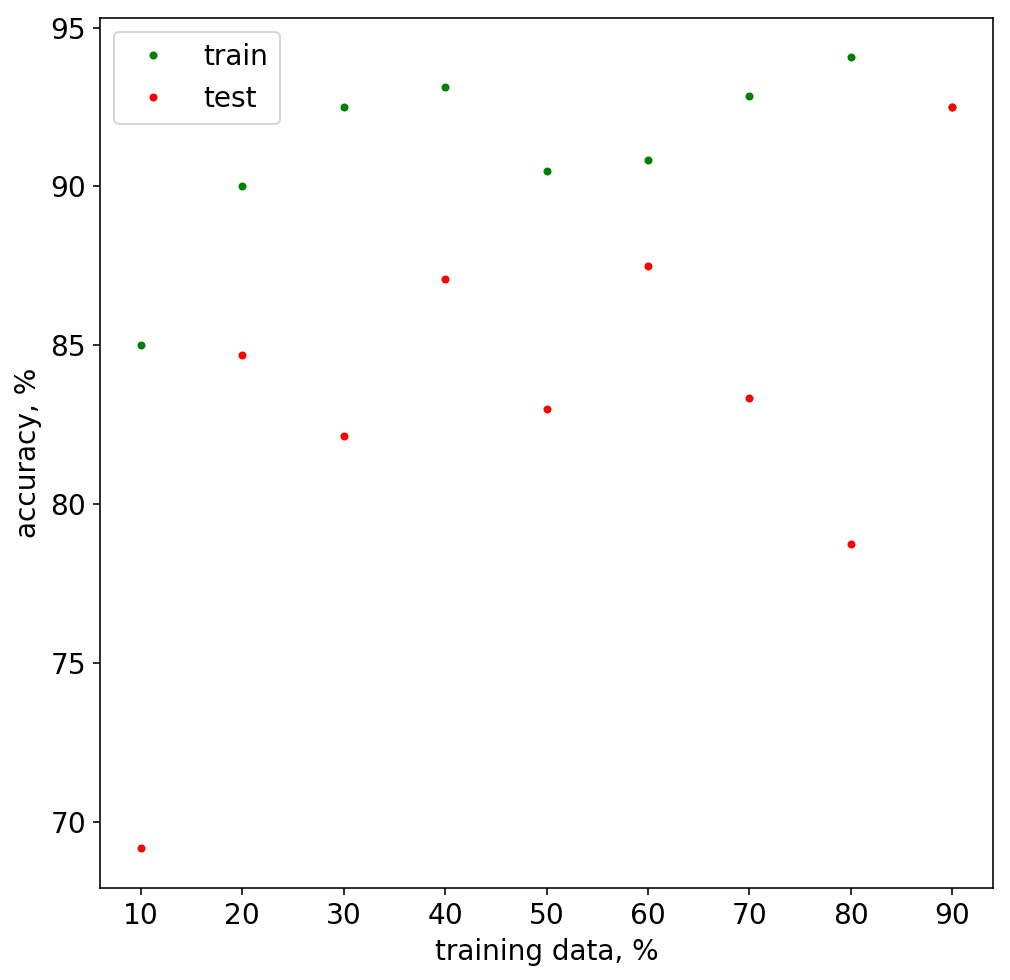

In [20]:
plt.plot(split*100, train*100,'.g', label='train')
plt.plot(split*100, test*100, '.r', label='test')
plt.legend(loc='best')
plt.xlabel("training data, %")
plt.ylabel("accuracy, %")

In [44]:
#it is a bit hard to say from just one split therefore we will look at the statistics for 100 splits with different percentage
train_av = ndarray((9,),float)
test_av = ndarray((9,),float)
for j in range(0, 1000):
    for i in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split[i-1])
        clf = KNeighborsClassifier(n_neighbors=3)
        clf.fit(X_train, y_train)
        train[i-1]=sum(clf.predict(X_train)==y_train)/len(y_train)
        test[i-1]=sum(clf.predict(X_test)==y_test)/len(y_test)
    train_av=train_av+train
    test_av=test_av+test
    
train_av=train_av/1000
test_av=test_av/1000

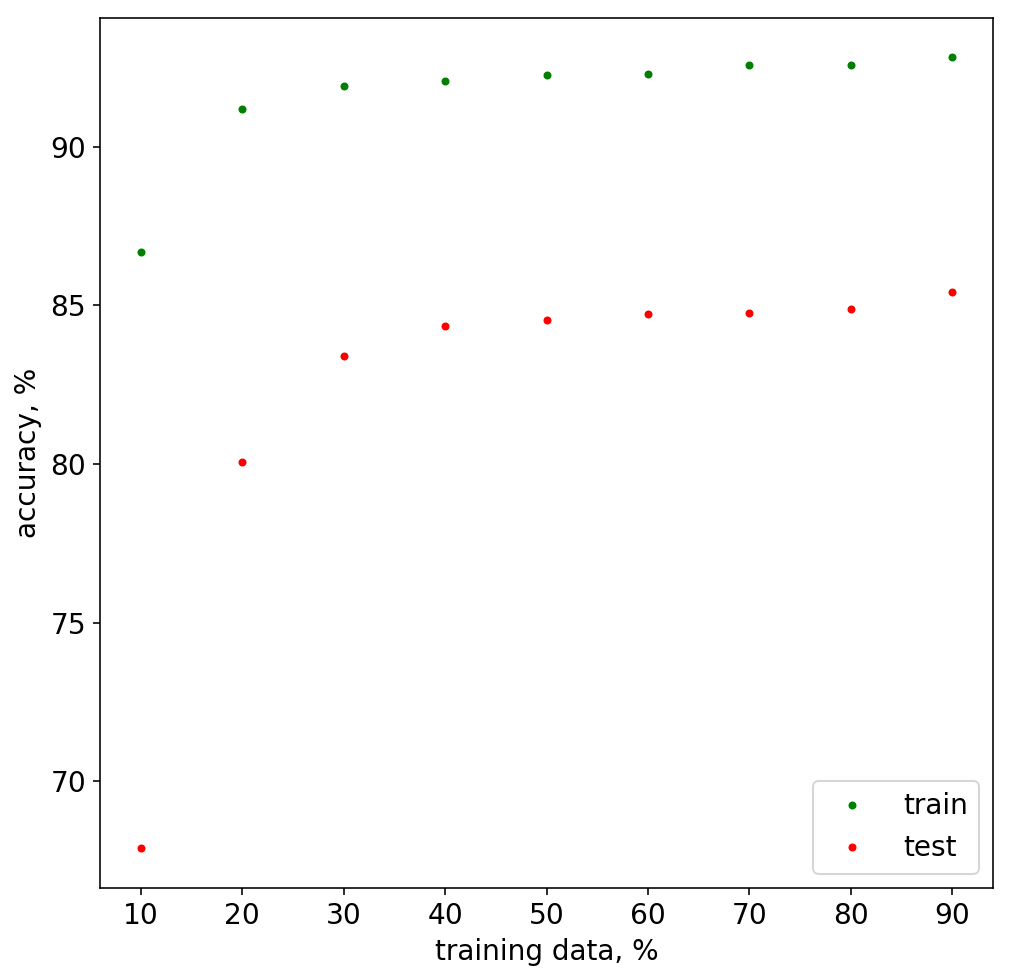

In [45]:
plt.plot(split*100, train_av*100,'.g', label='train')
plt.plot(split*100, test_av*100, '.r', label='test')
plt.legend(loc='best')
plt.xlabel("training data, %")
plt.ylabel("accuracy, %")

In [17]:
#from the above plot it becomes clear that after split of 30% for training the trainded accuracy does not increase too much
#and after 40% training test accuracy does not change much either
#further let's take training data 40% to achieve the best training

In [50]:
train_n = ndarray((8,),float)
test_n = ndarray((8,),float)
neigh= ndarray((8,),float)
for n in range (3,11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4)
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    neigh[n-3]=n;
    train_n[n-3]=sum(clf.predict(X_train)==y_train)/len(y_train)
    test_n[n-3]=sum(clf.predict(X_test)==y_test)/len(y_test)

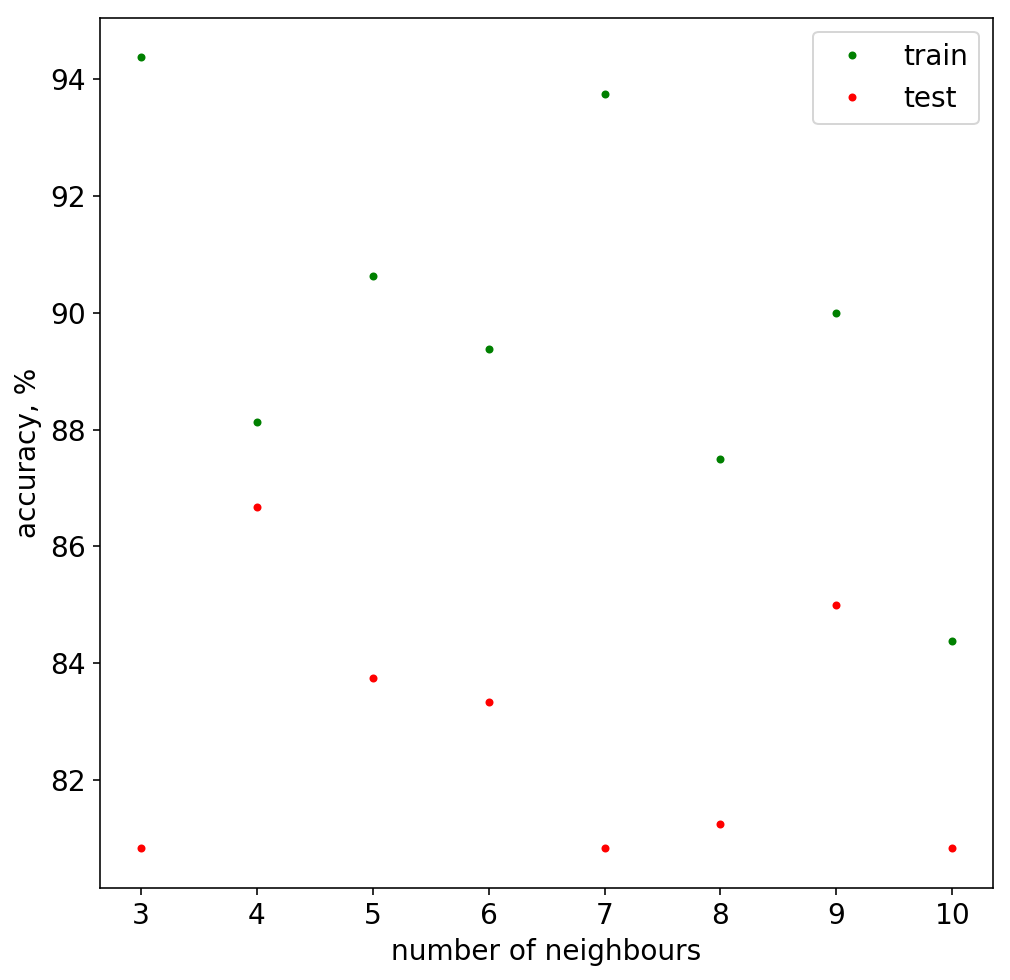

In [51]:
plt.plot(neigh, train_n*100,'.g', label='train')
plt.plot(neigh, test_n*100, '.r', label='test')
plt.legend(loc='best')
plt.xlabel("number of neighbours")
plt.ylabel("accuracy, %")

In [54]:
#again it does not look fully clear so we will look at average result over 1000 samples
train_n_av = ndarray((8,),float)
test_n_av = ndarray((8,),float)
for j in range(0, 1000):
    for n in range (3,10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4)
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X_train, y_train)
        train_n[n-3]=sum(clf.predict(X_train)==y_train)/len(y_train)
        test_n[n-3]=sum(clf.predict(X_test)==y_test)/len(y_test)  
    train_n_av=train_n_av+train_n
    test_n_av=test_n_av+test_n

train_n_av=train_n_av/1000
test_n_av=test_n_av/1000

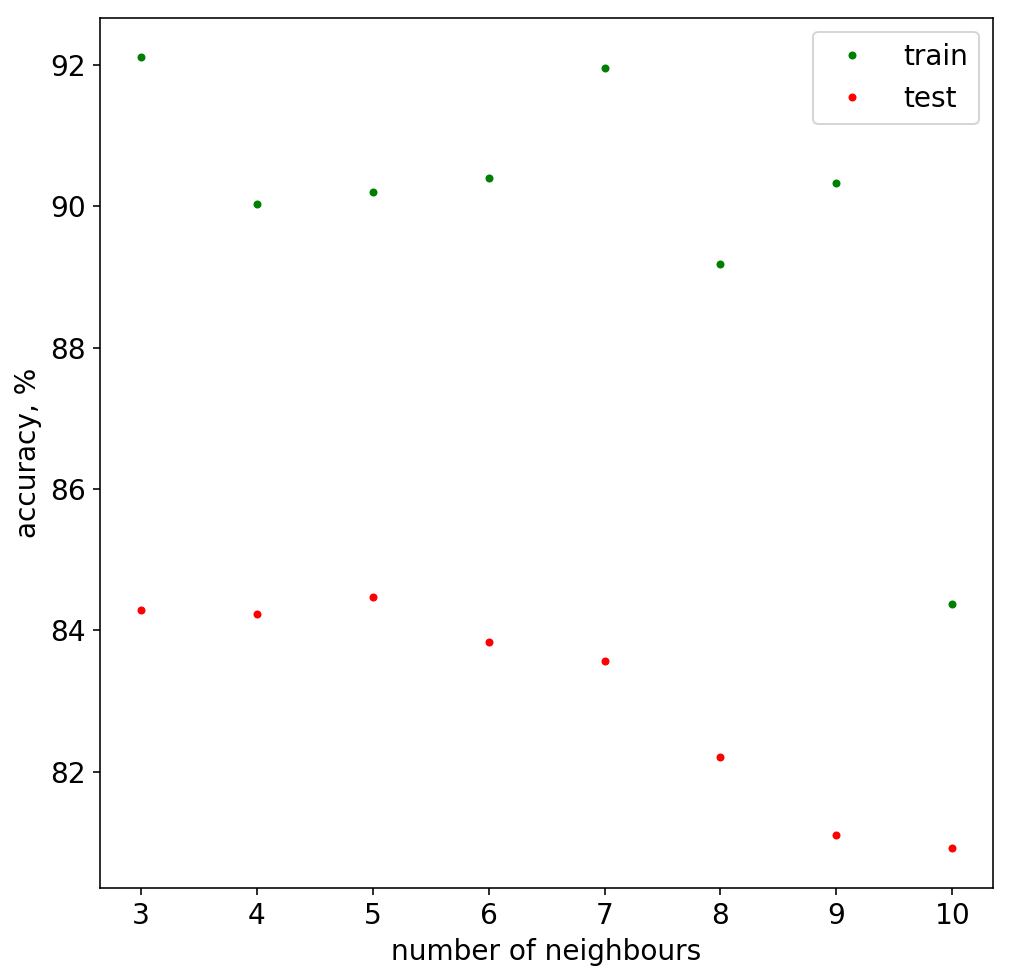

In [55]:
plt.plot(neigh, train_n_av*100,'.g', label='train')
plt.plot(neigh, test_n_av*100, '.r', label='test')
plt.legend(loc='best')
plt.xlabel("number of neighbours")
plt.ylabel("accuracy, %")

In [58]:
#it seems like it does not matter too much if we use 3 to 7 nearest neighbours
#after the test data accuracy is falling and at 10 neighbour model the accuracy of train data 6% less than other models
#the more nearest neighbours we use the more it will become the dominant colour if we use too many neighbours
#3nighbours seems to be good for our data set as its accuracy for training and testing datasets is high and it is the simpliest model
